In [41]:
import pandas as pd 
import nltk 
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,  roc_curve, auc
import nltk
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
col_name = ['target','id', 'date','flag', 'user', 'text']
dataset_encode = "ISO-8859-1"
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = dataset_encode,names=col_name)

In [9]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [11]:
df.shape

(1600000, 6)

In [12]:
df['target']= df['target'].replace(4, 1)
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [13]:
def clean_text(text):
    
    stop_words = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", 
    "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", 
    "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", 
    "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", 
    "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", 
    "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", 
    "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", 
    "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", 
    "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", 
    "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", 
    "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", 
    "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", 
    "that's", "the", "their", "theirs", "them", "themselves", "then", "there", 
    "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", 
    "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", 
    "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", 
    "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
    "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", 
    "you're", "you've", "your", "yours", "yourself", "yourselves"]
    
    def get_word_pos(tag):
        if tag.startswith('V'):
            return 'v'  # Verb
        elif tag.startswith('N'):
            return 'n'  # Noun
        elif tag.startswith('R'):
            return 'r'  # Adverb
        else:
            return 'n'  # Default to noun



    
    #convert to lower
    text = text.lower()
    
    #remove URL
    text = re.sub(r'(http[s]?://\S+|www\.\S+)', ' ', text)
    
    #replace @username with username 
    text = re.sub(r'@[\S]+', 'User', text)
    
    #remove hashtag sign
    text = re.sub(r'#(\S)+', r'\1', text)
    
    #remvoe numbers
    text = re.sub(r'\d+', '', text )
    
    #remove whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    #strip
    text = text.strip()
    
    #remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    #tokenize
    tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')
    tokens = tokenizer.tokenize(text)
    
    #pos
    pos_tag = nltk.pos_tag(tokens)
    
    #lemmatize 
    lemmatizer = WordNetLemmatizer()
    lammatized_token = [lemmatizer.lemmatize(token, get_word_pos(tag)) for token, tag in pos_tag]
    
    return ' '.join(lammatized_token)


In [16]:
df['text'] = df['text'].apply(clean_text)


In [17]:
x_train, x_test, y_train, y_test= train_test_split(df['text'], df['target'], random_state =42, test_size=.2)

In [18]:
x_train.shape, y_train.shape

((1280000,), (1280000,))

In [19]:
x_test.shape, y_test.shape

((320000,), (320000,))

In [20]:
vectorize = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [21]:
x_train = vectorize.fit_transform(x_train)

In [22]:
x_test = vectorize.transform(x_test)

In [42]:
def evaluate_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.81      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



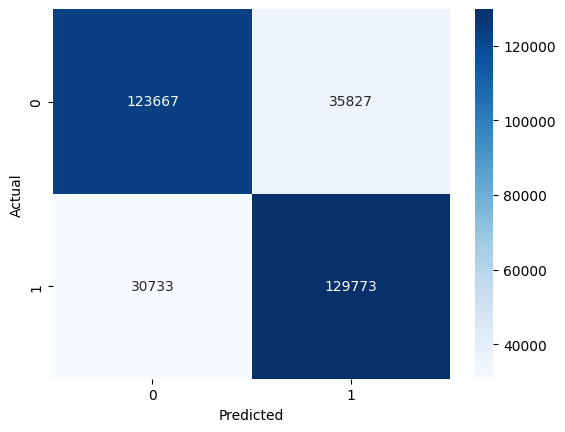

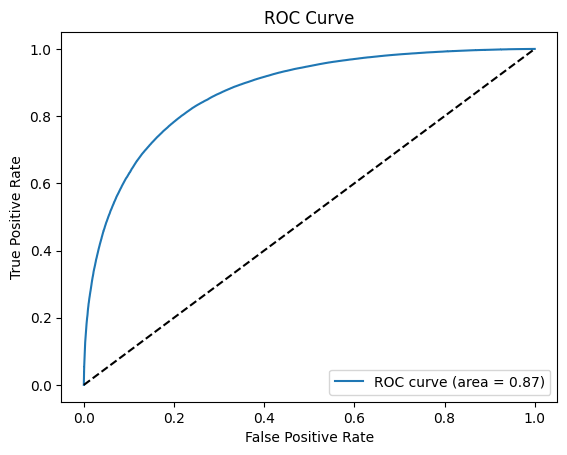

In [43]:
lr_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs = -1 )
evaluate_model = evaluate_model(lr_model)

In [45]:
test_tweet = ["I hate the new design of your website! It's too bad!"]

test_tweet = [clean_text(test_tweet[0])]
vectorized_tweet = vectorize.transform(test_tweet)

predicted_sentiment = lr_model.predict(vectorized_tweet)

print(f"Predicted Sentiment: {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")

Predicted Sentiment: Negative
